## Q-1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# Initial Data Points
data = np.array([18, 22, 25, 27, 42, 43]).reshape(-1, 1)

In [5]:
# Initialize the proximity matrix (distance matrix) using Euclidean distance
n = len(data)
proximity_matrix = np.zeros((n, n))

# Compute the initial proximity matrix (distance matrix)
for i in range(n):
    for j in range(n):
        proximity_matrix[i, j] = np.abs(data[i] - data[j])
        
print(proximity_matrix)

import warnings
warnings.filterwarnings('ignore')

[[ 0.  4.  7.  9. 24. 25.]
 [ 4.  0.  3.  5. 20. 21.]
 [ 7.  3.  0.  2. 17. 18.]
 [ 9.  5.  2.  0. 15. 16.]
 [24. 20. 17. 15.  0.  1.]
 [25. 21. 18. 16.  1.  0.]]


In [6]:
# Function to print the proximity matrix
def print_proximity_matrix(matrix, clusters, iteration):
    print(f"\nProximity Matrix at Iteration {iteration}:")
    matrix[np.isinf(matrix)] = 0 
    # Create a new DataFrame for displaying clusters
    df = pd.DataFrame(matrix, columns=[str(clusters[i]) for i in range(len(clusters))], 
                        index=[str(clusters[i]) for i in range(len(clusters))])
    display(df)

# Agglomerative hierarchical clustering using Single Linkage (min distance)
clusters = [[data[i][0]] for i in range(n)]  # Initialize each point as a separate cluster

iteration = 0
print_proximity_matrix(proximity_matrix, clusters, iteration)

while len(clusters) > 1:
    # Find the two closest clusters
    min_dist = float('inf')
    to_merge = (None, None)

    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            # Calculate the single linkage distance (minimum distance between clusters)
            dist = np.min([np.abs(p1 - p2) 
                           for p1 in clusters[i] for p2 in clusters[j]])
            if dist < min_dist:
                min_dist = dist
                to_merge = (i, j)

    # Merge the two closest clusters
    i, j = to_merge
    clusters[i].extend(clusters[j])
    del clusters[j]

    # Update the proximity matrix
    new_matrix = np.full((len(clusters), len(clusters)), np.inf)
    for x in range(len(clusters)):
        for y in range(x + 1, len(clusters)):
            new_matrix[x, y] = new_matrix[y, x] = np.min([
                np.abs(p1 - p2)
                for p1 in clusters[x] for p2 in clusters[y]
            ])

    iteration += 1
    print_proximity_matrix(new_matrix, clusters, iteration)



Proximity Matrix at Iteration 0:


,[18],[22],[25],[27],[42],[43]
[18],0.0,4.0,7.0,9.0,24.0,25.0
[22],4.0,0.0,3.0,5.0,20.0,21.0
[25],7.0,3.0,0.0,2.0,17.0,18.0
[27],9.0,5.0,2.0,0.0,15.0,16.0
[42],24.0,20.0,17.0,15.0,0.0,1.0
[43],25.0,21.0,18.0,16.0,1.0,0.0



Proximity Matrix at Iteration 1:


,[18],[22],[25],[27],"[42, 43]"
[18],0.0,4.0,7.0,9.0,24.0
[22],4.0,0.0,3.0,5.0,20.0
[25],7.0,3.0,0.0,2.0,17.0
[27],9.0,5.0,2.0,0.0,15.0
"[42, 43]",24.0,20.0,17.0,15.0,0.0



Proximity Matrix at Iteration 2:


,[18],[22],"[25, 27]","[42, 43]"
[18],0.0,4.0,7.0,24.0
[22],4.0,0.0,3.0,20.0
"[25, 27]",7.0,3.0,0.0,15.0
"[42, 43]",24.0,20.0,15.0,0.0



Proximity Matrix at Iteration 3:


,[18],"[22, 25, 27]","[42, 43]"
[18],0.0,4.0,24.0
"[22, 25, 27]",4.0,0.0,15.0
"[42, 43]",24.0,15.0,0.0



Proximity Matrix at Iteration 4:


,"[18, 22, 25, 27]","[42, 43]"
"[18, 22, 25, 27]",0.0,15.0
"[42, 43]",15.0,0.0



Proximity Matrix at Iteration 5:


,"[18, 22, 25, 27, 42, 43]"
"[18, 22, 25, 27, 42, 43]",0.0


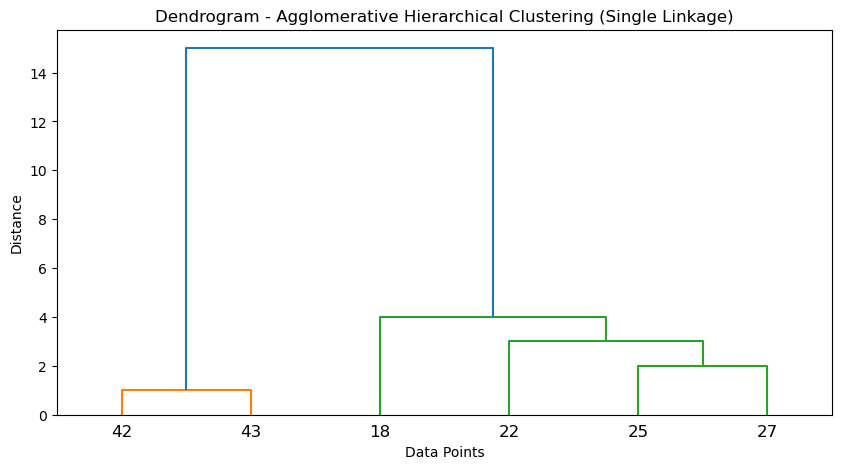

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Plot the dendrogram using scipy
linkage_matrix = linkage(data, method='single')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=[str(x) for x in data.flatten()])
plt.title('Dendrogram - Agglomerative Hierarchical Clustering (Single Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

## Q-2

In [12]:
# Initial 2D Data Points
data2 = np.array([[1, 1], [3, 2], [9, 1], [3, 7], [7, 2], 
                   [9, 7], [4, 8], [8, 3], [1, 4]])

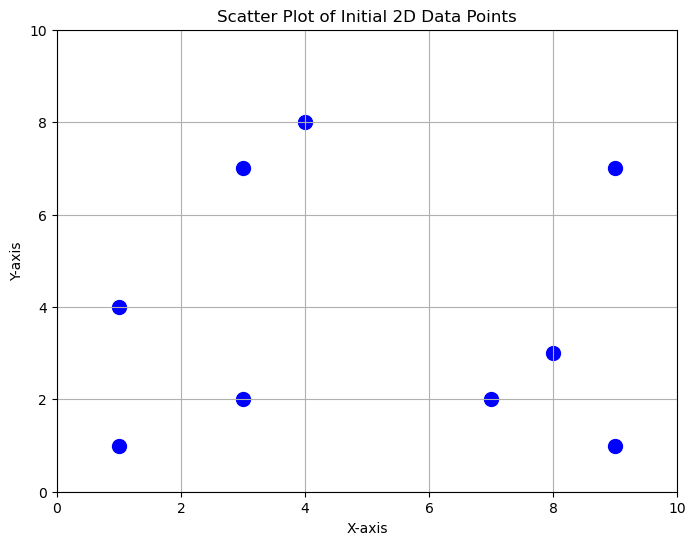

In [13]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], color='blue', s=100)  # 's' controls the size of the points
plt.title('Scatter Plot of Initial 2D Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

In [21]:
import numpy as np
import pandas as pd
from IPython.display import display

# Function to print the proximity matrix
def print_proximity_matrix(matrix, clusters, iteration):
    print(f"\nProximity Matrix at Iteration {iteration}:")
    matrix[np.isinf(matrix)] = 0  # Replace inf with 0 for display purposes
    
    # Create cluster labels as string representations of the clusters
    cluster_labels = ['{' + ', '.join([str(tuple(point)) for point in cluster]) + '}' for cluster in clusters]
    df = pd.DataFrame(matrix, columns=cluster_labels, index=cluster_labels)
    display(df)

# Function to compute distance based on linkage type for 2D data
def compute_distance(clusters, i, j, linkage):
    if linkage == 'single':
        return np.min([np.linalg.norm(np.array(p1) - np.array(p2)) for p1 in clusters[i] for p2 in clusters[j]])
    elif linkage == 'complete':
        return np.max([np.linalg.norm(np.array(p1) - np.array(p2)) for p1 in clusters[i] for p2 in clusters[j]])
    elif linkage == 'average':
        return np.mean([np.linalg.norm(np.array(p1) - np.array(p2)) for p1 in clusters[i] for p2 in clusters[j]])

# Generalized Agglomerative Hierarchical Clustering Function for 2D Data
def agglomerative_clustering(data, linkage='single'):
    # Initialize each point as a separate cluster
    clusters = [[data[i]] for i in range(len(data))]
    n = len(data)

    # Initialize proximity matrix
    proximity_matrix = np.full((n, n), np.inf)
    for i in range(n):
        for j in range(i + 1, n):
            proximity_matrix[i, j] = proximity_matrix[j, i] = np.linalg.norm(data[i] - data[j])

    iteration = 0
    print_proximity_matrix(proximity_matrix, clusters, iteration)

    while len(clusters) > 1:
        # Find the two closest clusters
        min_dist = float('inf')
        to_merge = (None, None)

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = compute_distance(clusters, i, j, linkage)
                if dist < min_dist:
                    min_dist = dist
                    to_merge = (i, j)

        # Merge the two closest clusters
        i, j = to_merge
        clusters[i].extend(clusters[j])  # Merge clusters
        del clusters[j]  # Remove the merged cluster

        # Update the proximity matrix for the new clusters
        new_matrix = np.full((len(clusters), len(clusters)), np.inf)
        for x in range(len(clusters)):
            for y in range(x + 1, len(clusters)):
                new_matrix[x, y] = new_matrix[y, x] = compute_distance(clusters, x, y, linkage)

        iteration += 1
        print_proximity_matrix(new_matrix, clusters, iteration)

# Example usage
data2 = np.array([[1, 1], [3, 2], [9, 1], [3, 7], [7, 2], 
                  [9, 7], [4, 8], [8, 3], [1, 4]])
linkage_type = 'single'  # Options: 'single', 'complete', 'average'
agglomerative_clustering(data2, linkage=linkage_type)



Proximity Matrix at Iteration 0:


,"{(1, 1)}","{(3, 2)}","{(9, 1)}","{(3, 7)}","{(7, 2)}","{(9, 7)}","{(4, 8)}","{(8, 3)}","{(1, 4)}"
"{(1, 1)}",0.000000,2.236068,8.000000,6.324555,6.082763,10.000000,7.615773,7.280110,3.000000
"{(3, 2)}",2.236068,0.000000,6.082763,5.000000,4.000000,7.810250,6.082763,5.099020,2.828427
"{(9, 1)}",8.000000,6.082763,0.000000,8.485281,2.236068,6.000000,8.602325,2.236068,8.544004
"{(3, 7)}",6.324555,5.000000,8.485281,0.000000,6.403124,6.000000,1.414214,6.403124,3.605551
"{(7, 2)}",6.082763,4.000000,2.236068,6.403124,0.000000,5.385165,6.708204,1.414214,6.324555
"{(9, 7)}",10.000000,7.810250,6.000000,6.000000,5.385165,0.000000,5.099020,4.123106,8.544004
"{(4, 8)}",7.615773,6.082763,8.602325,1.414214,6.708204,5.099020,0.000000,6.403124,5.000000
"{(8, 3)}",7.280110,5.099020,2.236068,6.403124,1.414214,4.123106,6.403124,0.000000,7.071068
"{(1, 4)}",3.000000,2.828427,8.544004,3.605551,6.324555,8.544004,5.000000,7.071068,0.000000



Proximity Matrix at Iteration 1:


,"{(1, 1)}","{(3, 2)}","{(9, 1)}","{(3, 7), (4, 8)}","{(7, 2)}","{(9, 7)}","{(8, 3)}","{(1, 4)}"
"{(1, 1)}",0.000000,2.236068,8.000000,6.324555,6.082763,10.000000,7.280110,3.000000
"{(3, 2)}",2.236068,0.000000,6.082763,5.000000,4.000000,7.810250,5.099020,2.828427
"{(9, 1)}",8.000000,6.082763,0.000000,8.485281,2.236068,6.000000,2.236068,8.544004
"{(3, 7), (4, 8)}",6.324555,5.000000,8.485281,0.000000,6.403124,5.099020,6.403124,3.605551
"{(7, 2)}",6.082763,4.000000,2.236068,6.403124,0.000000,5.385165,1.414214,6.324555
"{(9, 7)}",10.000000,7.810250,6.000000,5.099020,5.385165,0.000000,4.123106,8.544004
"{(8, 3)}",7.280110,5.099020,2.236068,6.403124,1.414214,4.123106,0.000000,7.071068
"{(1, 4)}",3.000000,2.828427,8.544004,3.605551,6.324555,8.544004,7.071068,0.000000



Proximity Matrix at Iteration 2:


,"{(1, 1)}","{(3, 2)}","{(9, 1)}","{(3, 7), (4, 8)}","{(7, 2), (8, 3)}","{(9, 7)}","{(1, 4)}"
"{(1, 1)}",0.000000,2.236068,8.000000,6.324555,6.082763,10.000000,3.000000
"{(3, 2)}",2.236068,0.000000,6.082763,5.000000,4.000000,7.810250,2.828427
"{(9, 1)}",8.000000,6.082763,0.000000,8.485281,2.236068,6.000000,8.544004
"{(3, 7), (4, 8)}",6.324555,5.000000,8.485281,0.000000,6.403124,5.099020,3.605551
"{(7, 2), (8, 3)}",6.082763,4.000000,2.236068,6.403124,0.000000,4.123106,6.324555
"{(9, 7)}",10.000000,7.810250,6.000000,5.099020,4.123106,0.000000,8.544004
"{(1, 4)}",3.000000,2.828427,8.544004,3.605551,6.324555,8.544004,0.000000



Proximity Matrix at Iteration 3:


,"{(1, 1), (3, 2)}","{(9, 1)}","{(3, 7), (4, 8)}","{(7, 2), (8, 3)}","{(9, 7)}","{(1, 4)}"
"{(1, 1), (3, 2)}",0.000000,6.082763,5.000000,4.000000,7.810250,2.828427
"{(9, 1)}",6.082763,0.000000,8.485281,2.236068,6.000000,8.544004
"{(3, 7), (4, 8)}",5.000000,8.485281,0.000000,6.403124,5.099020,3.605551
"{(7, 2), (8, 3)}",4.000000,2.236068,6.403124,0.000000,4.123106,6.324555
"{(9, 7)}",7.810250,6.000000,5.099020,4.123106,0.000000,8.544004
"{(1, 4)}",2.828427,8.544004,3.605551,6.324555,8.544004,0.000000



Proximity Matrix at Iteration 4:


,"{(1, 1), (3, 2)}","{(9, 1), (7, 2), (8, 3)}","{(3, 7), (4, 8)}","{(9, 7)}","{(1, 4)}"
"{(1, 1), (3, 2)}",0.000000,4.000000,5.000000,7.810250,2.828427
"{(9, 1), (7, 2), (8, 3)}",4.000000,0.000000,6.403124,4.123106,6.324555
"{(3, 7), (4, 8)}",5.000000,6.403124,0.000000,5.099020,3.605551
"{(9, 7)}",7.810250,4.123106,5.099020,0.000000,8.544004
"{(1, 4)}",2.828427,6.324555,3.605551,8.544004,0.000000



Proximity Matrix at Iteration 5:


,"{(1, 1), (3, 2), (1, 4)}","{(9, 1), (7, 2), (8, 3)}","{(3, 7), (4, 8)}","{(9, 7)}"
"{(1, 1), (3, 2), (1, 4)}",0.000000,4.000000,3.605551,7.810250
"{(9, 1), (7, 2), (8, 3)}",4.000000,0.000000,6.403124,4.123106
"{(3, 7), (4, 8)}",3.605551,6.403124,0.000000,5.099020
"{(9, 7)}",7.810250,4.123106,5.099020,0.000000



Proximity Matrix at Iteration 6:


,"{(1, 1), (3, 2), (1, 4), (3, 7), (4, 8)}","{(9, 1), (7, 2), (8, 3)}","{(9, 7)}"
"{(1, 1), (3, 2), (1, 4), (3, 7), (4, 8)}",0.00000,4.000000,5.099020
"{(9, 1), (7, 2), (8, 3)}",4.00000,0.000000,4.123106
"{(9, 7)}",5.09902,4.123106,0.000000



Proximity Matrix at Iteration 7:


,"{(1, 1), (3, 2), (1, 4), (3, 7), (4, 8), (9, 1), (7, 2), (8, 3)}","{(9, 7)}"
"{(1, 1), (3, 2), (1, 4), (3, 7), (4, 8), (9, 1), (7, 2), (8, 3)}",0.000000,4.123106
"{(9, 7)}",4.123106,0.000000



Proximity Matrix at Iteration 8:


,"{(1, 1), (3, 2), (1, 4), (3, 7), (4, 8), (9, 1), (7, 2), (8, 3), (9, 7)}"
"{(1, 1), (3, 2), (1, 4), (3, 7), (4, 8), (9, 1), (7, 2), (8, 3), (9, 7)}",0.0


In [38]:
# trying to plot dendrogram manually without sklearn

# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import dendrogram

# # Function to compute the distance between two clusters based on average linkage
# def compute_distance(cluster1, cluster2):
#     return np.mean([np.linalg.norm(np.array(p1) - np.array(p2)) for p1 in cluster1 for p2 in cluster2])

# # Function to create the linkage matrix
# def create_linkage_matrix(data):
#     num_points = len(data)
#     clusters = [[data[i]] for i in range(num_points)]  # Start with each point in its own cluster
#     linkage_matrix = []

#     # Merge clusters until only one cluster remains
#     while len(clusters) > 1:
#         min_dist = float('inf')
#         to_merge = (None, None)

#         # Find the two closest clusters
#         for i in range(len(clusters)):
#             for j in range(i + 1, len(clusters)):
#                 dist = compute_distance(clusters[i], clusters[j])
#                 if dist < min_dist:
#                     min_dist = dist
#                     to_merge = (i, j)

#         # Merge the two closest clusters
#         i, j = to_merge
#         new_cluster = clusters[i] + clusters[j]
#         linkage_matrix.append([i, j, min_dist, len(new_cluster)])  # Store merging information
#         clusters[i] = new_cluster  # Update the first cluster with the merged cluster
#         del clusters[j]  # Remove the merged cluster

#     return np.array(linkage_matrix)

# # Function to plot the dendrogram
# def plot_dendrogram(data):
#     linkage_matrix = create_linkage_matrix(data)

#     plt.figure(figsize=(10, 5))
#     # Prepare labels for the dendrogram
#     labels = [f"{tuple(point)}" for point in data]
#     dendrogram(linkage_matrix, labels=labels)
#     plt.title('Dendrogram - Agglomerative Hierarchical Clustering')
#     plt.xlabel('Data Points')
#     plt.ylabel('Distance')
#     plt.show()

# # Example usage with 2D data points
# data2 = np.array([[1, 1], [3, 2], [9, 1], [3, 7], [7, 2], 
#                   [9, 7], [4, 8], [8, 3], [1, 4]])

# plot_dendrogram(data2)


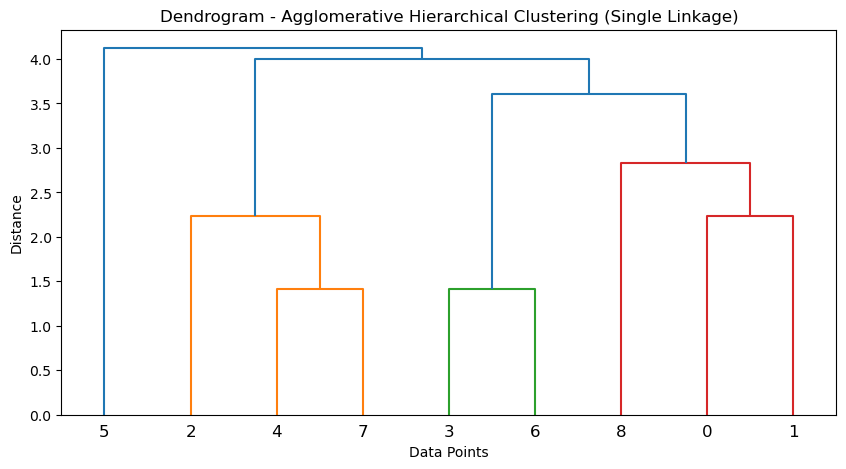

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Plot the dendrogram using scipy
linkage_matrix = linkage(data2, method='single')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=[str(x) for x in range(len(data2))])
plt.title('Dendrogram - Agglomerative Hierarchical Clustering (Single Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

## Q-3

In [25]:
# Initial Data Points
data = np.array([18, 22, 25, 27, 42, 43]).reshape(-1, 1)

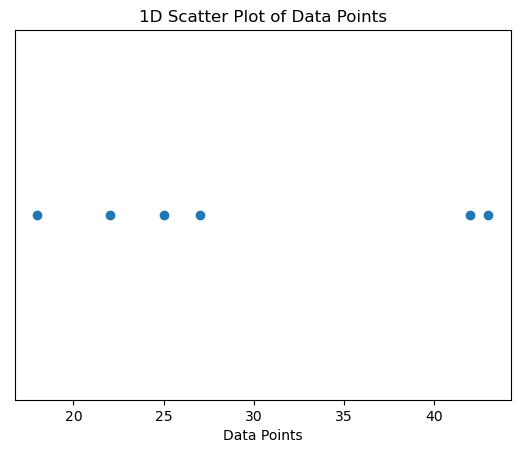

In [33]:
# Scatter plot
plt.scatter(data, [0] * len(data), marker='o')  # Y-values are all zero for 1D scatter

# Customize the plot
plt.yticks([])  # Remove y-axis ticks
plt.xlabel('Data Points')
plt.title('1D Scatter Plot of Data Points')

# Show the plot
plt.show()

### The code below is the generalized code which works for both 1D and 2D points,all distance metrics and all linkages - single,complete and average 

In [14]:
import numpy as np
import pandas as pd
from IPython.display import display

# Function to compute distance based on the selected metric
def compute_distance(point1, point2, distance_type='euclidean', p=3):
    if distance_type == 'euclidean':
        return np.linalg.norm(point1 - point2)
    elif distance_type == 'manhattan':
        return np.sum(np.abs(point1 - point2))
    elif distance_type == 'minkowski':
        return np.power(np.sum(np.abs(point1 - point2) ** p), 1/p)
    else:
        raise ValueError("Choose 'euclidean', 'manhattan', or 'minkowski'.")

# Function to compute distance between clusters based on linkage type
def cluster_distance(cluster1, cluster2, linkage, distance_type, p=3):
    distances = [compute_distance(pt1, pt2, distance_type, p) for pt1 in cluster1 for pt2 in cluster2]
    if linkage == 'single':
        return min(distances)
    elif linkage == 'complete':
        return max(distances)
    elif linkage == 'average':
        return np.mean(distances)
    else:
        raise ValueError("Choose 'single', 'complete', or 'average'.")

# Function to print the proximity matrix with the current clusters
def print_proximity_matrix(matrix, clusters, iteration):
    print(f"\nProximity Matrix at Iteration {iteration}:")
    cluster_labels = ['{' + ', '.join(map(str, [tuple(pt) for pt in cluster])) + '}' for cluster in clusters]
    df = pd.DataFrame(matrix, columns=cluster_labels, index=cluster_labels)
    display(df)

# Agglomerative Hierarchical Clustering Function
def agglomerative_clustering(data, linkage='single', distance_type='euclidean', p=3, print_proximity=False):
    clusters = [[point] for point in data]  # Start with each point as its own cluster
    n = len(data)

    # Initialize proximity matrix
    proximity_matrix = np.full((n, n), np.inf)
    for i in range(n):
        for j in range(i + 1, n):
            proximity_matrix[i, j] = proximity_matrix[j, i] = compute_distance(data[i], data[j], distance_type, p)
    np.fill_diagonal(proximity_matrix, 0)  # Set diagonal to 0

    iteration = 0
    if print_proximity:
        print_proximity_matrix(proximity_matrix, clusters, iteration)

    while len(clusters) > 1:
        # Find the two closest clusters
        min_dist, to_merge = float('inf'), (None, None)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = cluster_distance(clusters[i], clusters[j], linkage, distance_type, p)
                if dist < min_dist:
                    min_dist, to_merge = dist, (i, j)

        # Merge the two closest clusters
        i, j = to_merge
        clusters[i].extend(clusters[j])
        del clusters[j]

        # Update the proximity matrix
        new_matrix = np.full((len(clusters), len(clusters)), np.inf)
        for x in range(len(clusters)):
            for y in range(x + 1, len(clusters)):
                new_matrix[x, y] = new_matrix[y, x] = cluster_distance(clusters[x], clusters[y], linkage, distance_type, p)
        # np.fill_diagonal(new_matrix, 0)  # Set diagonal to 0

        # proximity_matrix = new_matrix  # Update proximity matrix
        iteration += 1
        if print_proximity:
            print_proximity_matrix(new_matrix, clusters, iteration)

# Example usage
data2 = np.array([[1, 1], [3, 2], [9, 1], [3, 7], [7, 2], 
                  [9, 7], [4, 8], [8, 3], [1, 4]])

# Select distance metric and linkage type
linkage_type = 'single'  # Options: 'single', 'complete', 'average'
distance_type = 'euclidean'  # Options: 'euclidean', 'manhattan', 'minkowski'

# Run clustering with the selected distance metric
agglomerative_clustering(data2, linkage=linkage_type, distance_type=distance_type, print_proximity=True)



Proximity Matrix at Iteration 0:


,"{(1, 1)}","{(3, 2)}","{(9, 1)}","{(3, 7)}","{(7, 2)}","{(9, 7)}","{(4, 8)}","{(8, 3)}","{(1, 4)}"
"{(1, 1)}",0.000000,2.236068,8.000000,6.324555,6.082763,10.000000,7.615773,7.280110,3.000000
"{(3, 2)}",2.236068,0.000000,6.082763,5.000000,4.000000,7.810250,6.082763,5.099020,2.828427
"{(9, 1)}",8.000000,6.082763,0.000000,8.485281,2.236068,6.000000,8.602325,2.236068,8.544004
"{(3, 7)}",6.324555,5.000000,8.485281,0.000000,6.403124,6.000000,1.414214,6.403124,3.605551
"{(7, 2)}",6.082763,4.000000,2.236068,6.403124,0.000000,5.385165,6.708204,1.414214,6.324555
"{(9, 7)}",10.000000,7.810250,6.000000,6.000000,5.385165,0.000000,5.099020,4.123106,8.544004
"{(4, 8)}",7.615773,6.082763,8.602325,1.414214,6.708204,5.099020,0.000000,6.403124,5.000000
"{(8, 3)}",7.280110,5.099020,2.236068,6.403124,1.414214,4.123106,6.403124,0.000000,7.071068
"{(1, 4)}",3.000000,2.828427,8.544004,3.605551,6.324555,8.544004,5.000000,7.071068,0.000000



Proximity Matrix at Iteration 1:


,"{(1, 1)}","{(3, 2)}","{(9, 1)}","{(3, 7), (4, 8)}","{(7, 2)}","{(9, 7)}","{(8, 3)}","{(1, 4)}"
"{(1, 1)}",inf,2.236068,8.000000,6.324555,6.082763,10.000000,7.280110,3.000000
"{(3, 2)}",2.236068,inf,6.082763,5.000000,4.000000,7.810250,5.099020,2.828427
"{(9, 1)}",8.000000,6.082763,inf,8.485281,2.236068,6.000000,2.236068,8.544004
"{(3, 7), (4, 8)}",6.324555,5.000000,8.485281,inf,6.403124,5.099020,6.403124,3.605551
"{(7, 2)}",6.082763,4.000000,2.236068,6.403124,inf,5.385165,1.414214,6.324555
"{(9, 7)}",10.000000,7.810250,6.000000,5.099020,5.385165,inf,4.123106,8.544004
"{(8, 3)}",7.280110,5.099020,2.236068,6.403124,1.414214,4.123106,inf,7.071068
"{(1, 4)}",3.000000,2.828427,8.544004,3.605551,6.324555,8.544004,7.071068,inf



Proximity Matrix at Iteration 2:


,"{(1, 1)}","{(3, 2)}","{(9, 1)}","{(3, 7), (4, 8)}","{(7, 2), (8, 3)}","{(9, 7)}","{(1, 4)}"
"{(1, 1)}",inf,2.236068,8.000000,6.324555,6.082763,10.000000,3.000000
"{(3, 2)}",2.236068,inf,6.082763,5.000000,4.000000,7.810250,2.828427
"{(9, 1)}",8.000000,6.082763,inf,8.485281,2.236068,6.000000,8.544004
"{(3, 7), (4, 8)}",6.324555,5.000000,8.485281,inf,6.403124,5.099020,3.605551
"{(7, 2), (8, 3)}",6.082763,4.000000,2.236068,6.403124,inf,4.123106,6.324555
"{(9, 7)}",10.000000,7.810250,6.000000,5.099020,4.123106,inf,8.544004
"{(1, 4)}",3.000000,2.828427,8.544004,3.605551,6.324555,8.544004,inf



Proximity Matrix at Iteration 3:


,"{(1, 1), (3, 2)}","{(9, 1)}","{(3, 7), (4, 8)}","{(7, 2), (8, 3)}","{(9, 7)}","{(1, 4)}"
"{(1, 1), (3, 2)}",inf,6.082763,5.000000,4.000000,7.810250,2.828427
"{(9, 1)}",6.082763,inf,8.485281,2.236068,6.000000,8.544004
"{(3, 7), (4, 8)}",5.000000,8.485281,inf,6.403124,5.099020,3.605551
"{(7, 2), (8, 3)}",4.000000,2.236068,6.403124,inf,4.123106,6.324555
"{(9, 7)}",7.810250,6.000000,5.099020,4.123106,inf,8.544004
"{(1, 4)}",2.828427,8.544004,3.605551,6.324555,8.544004,inf



Proximity Matrix at Iteration 4:


,"{(1, 1), (3, 2)}","{(9, 1), (7, 2), (8, 3)}","{(3, 7), (4, 8)}","{(9, 7)}","{(1, 4)}"
"{(1, 1), (3, 2)}",inf,4.000000,5.000000,7.810250,2.828427
"{(9, 1), (7, 2), (8, 3)}",4.000000,inf,6.403124,4.123106,6.324555
"{(3, 7), (4, 8)}",5.000000,6.403124,inf,5.099020,3.605551
"{(9, 7)}",7.810250,4.123106,5.099020,inf,8.544004
"{(1, 4)}",2.828427,6.324555,3.605551,8.544004,inf



Proximity Matrix at Iteration 5:


,"{(1, 1), (3, 2), (1, 4)}","{(9, 1), (7, 2), (8, 3)}","{(3, 7), (4, 8)}","{(9, 7)}"
"{(1, 1), (3, 2), (1, 4)}",inf,4.000000,3.605551,7.810250
"{(9, 1), (7, 2), (8, 3)}",4.000000,inf,6.403124,4.123106
"{(3, 7), (4, 8)}",3.605551,6.403124,inf,5.099020
"{(9, 7)}",7.810250,4.123106,5.099020,inf



Proximity Matrix at Iteration 6:


,"{(1, 1), (3, 2), (1, 4), (3, 7), (4, 8)}","{(9, 1), (7, 2), (8, 3)}","{(9, 7)}"
"{(1, 1), (3, 2), (1, 4), (3, 7), (4, 8)}",inf,4.000000,5.099020
"{(9, 1), (7, 2), (8, 3)}",4.00000,inf,4.123106
"{(9, 7)}",5.09902,4.123106,inf



Proximity Matrix at Iteration 7:


,"{(1, 1), (3, 2), (1, 4), (3, 7), (4, 8), (9, 1), (7, 2), (8, 3)}","{(9, 7)}"
"{(1, 1), (3, 2), (1, 4), (3, 7), (4, 8), (9, 1), (7, 2), (8, 3)}",inf,4.123106
"{(9, 7)}",4.123106,inf



Proximity Matrix at Iteration 8:


,"{(1, 1), (3, 2), (1, 4), (3, 7), (4, 8), (9, 1), (7, 2), (8, 3), (9, 7)}"
"{(1, 1), (3, 2), (1, 4), (3, 7), (4, 8), (9, 1), (7, 2), (8, 3), (9, 7)}",inf


In [44]:
# Example usage with 1D data
data1d = np.array([[18], [22], [25], [27], [42], [43]])  # 1D points

# Select distance metric and linkage type
linkage_type = 'single'  # Options: 'single', 'complete', 'average'
distance_type = 'euclidean'  # Options: 'euclidean', 'manhattan', 'minkowski'

# Run clustering with the selected distance metric
agglomerative_clustering(data1d, linkage=linkage_type, distance_type=distance_type, print_proximity=True)



Proximity Matrix at Iteration 0:


,"{(18,)}","{(22,)}","{(25,)}","{(27,)}","{(42,)}","{(43,)}"
"{(18,)}",0.0,4.0,7.0,9.0,24.0,25.0
"{(22,)}",4.0,0.0,3.0,5.0,20.0,21.0
"{(25,)}",7.0,3.0,0.0,2.0,17.0,18.0
"{(27,)}",9.0,5.0,2.0,0.0,15.0,16.0
"{(42,)}",24.0,20.0,17.0,15.0,0.0,1.0
"{(43,)}",25.0,21.0,18.0,16.0,1.0,0.0



Proximity Matrix at Iteration 1:


,"{(18,)}","{(22,)}","{(25,)}","{(27,)}","{(42,), (43,)}"
"{(18,)}",0.0,4.0,7.0,9.0,24.5
"{(22,)}",4.0,0.0,3.0,5.0,20.5
"{(25,)}",7.0,3.0,0.0,2.0,17.5
"{(27,)}",9.0,5.0,2.0,0.0,15.5
"{(42,), (43,)}",24.5,20.5,17.5,15.5,0.0



Proximity Matrix at Iteration 2:


,"{(18,)}","{(22,)}","{(25,), (27,)}","{(42,), (43,)}"
"{(18,)}",0.0,4.0,8.0,24.5
"{(22,)}",4.0,0.0,4.0,20.5
"{(25,), (27,)}",8.0,4.0,0.0,16.5
"{(42,), (43,)}",24.5,20.5,16.5,0.0



Proximity Matrix at Iteration 3:


,"{(18,), (22,)}","{(25,), (27,)}","{(42,), (43,)}"
"{(18,), (22,)}",0.0,6.0,22.5
"{(25,), (27,)}",6.0,0.0,16.5
"{(42,), (43,)}",22.5,16.5,0.0



Proximity Matrix at Iteration 4:


,"{(18,), (22,), (25,), (27,)}","{(42,), (43,)}"
"{(18,), (22,), (25,), (27,)}",0.0,19.5
"{(42,), (43,)}",19.5,0.0



Proximity Matrix at Iteration 5:


,"{(18,), (22,), (25,), (27,), (42,), (43,)}"
"{(18,), (22,), (25,), (27,), (42,), (43,)}",0.0


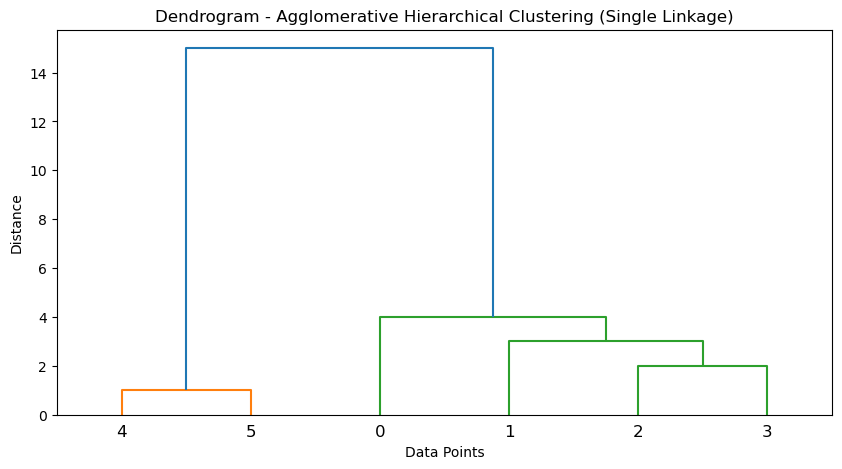

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Plot the dendrogram using scipy
linkage_matrix = linkage(data, method='single')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=[str(x) for x in range(len(data))])
plt.title('Dendrogram - Agglomerative Hierarchical Clustering (Single Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

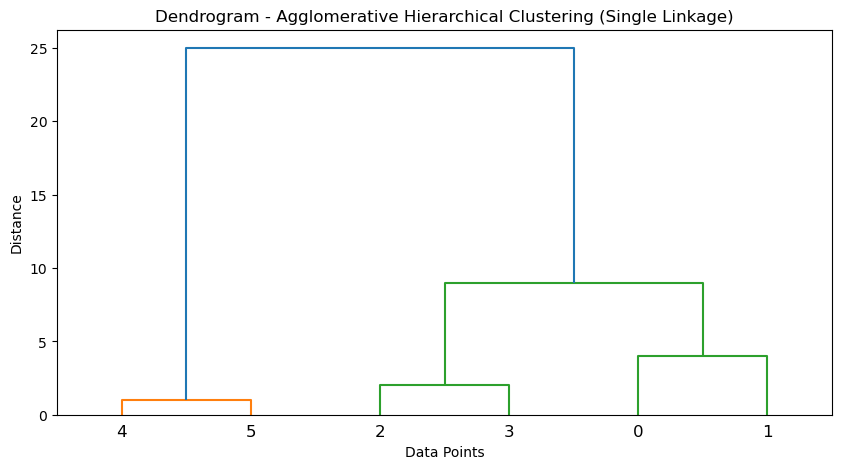

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Plot the dendrogram using scipy
linkage_matrix = linkage(data, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=[str(x) for x in range(len(data))])
plt.title('Dendrogram - Agglomerative Hierarchical Clustering (Complete Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

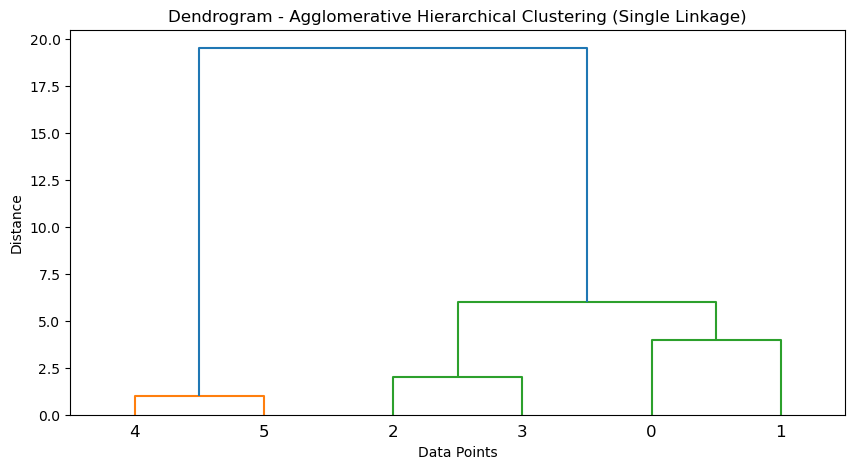

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Plot the dendrogram using scipy
linkage_matrix = linkage(data, method='average')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=[str(x) for x in range(len(data))])
plt.title('Dendrogram - Agglomerative Hierarchical Clustering (Average Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

## Additional Questions

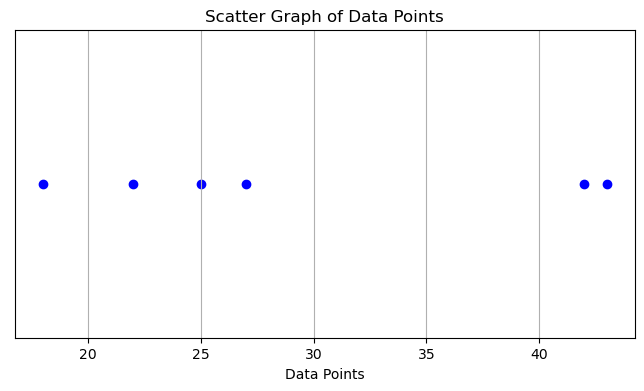

Euclidean Distance Proximity Matrix:
      P1    P2    P3    P4    P5    P6
P1   0.0   4.0   7.0   9.0  24.0  25.0
P2   4.0   0.0   3.0   5.0  20.0  21.0
P3   7.0   3.0   0.0   2.0  17.0  18.0
P4   9.0   5.0   2.0   0.0  15.0  16.0
P5  24.0  20.0  17.0  15.0   0.0   1.0
P6  25.0  21.0  18.0  16.0   1.0   0.0 

Manhattan Distance Proximity Matrix:
      P1    P2    P3    P4    P5    P6
P1   0.0   4.0   7.0   9.0  24.0  25.0
P2   4.0   0.0   3.0   5.0  20.0  21.0
P3   7.0   3.0   0.0   2.0  17.0  18.0
P4   9.0   5.0   2.0   0.0  15.0  16.0
P5  24.0  20.0  17.0  15.0   0.0   1.0
P6  25.0  21.0  18.0  16.0   1.0   0.0 

Minkowski Distance Proximity Matrix (p=3):
      P1    P2    P3    P4    P5    P6
P1   0.0   4.0   7.0   9.0  24.0  25.0
P2   4.0   0.0   3.0   5.0  20.0  21.0
P3   7.0   3.0   0.0   2.0  17.0  18.0
P4   9.0   5.0   2.0   0.0  15.0  16.0
P5  24.0  20.0  17.0  15.0   0.0   1.0
P6  25.0  21.0  18.0  16.0   1.0   0.0 



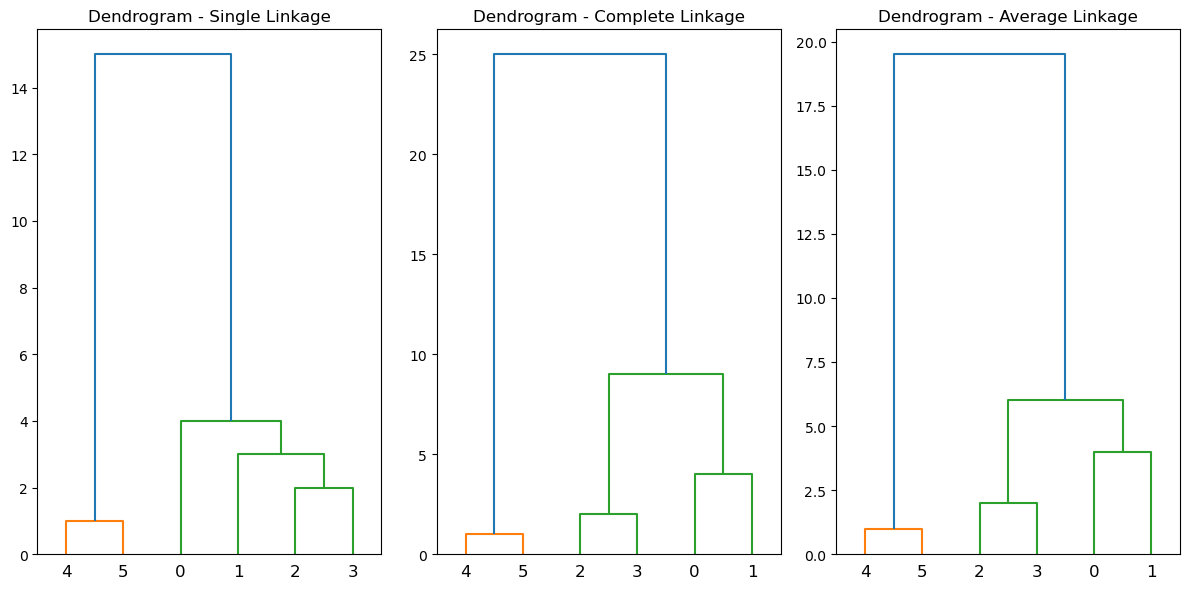

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances
import pandas as pd

# Initial Data Points
data = np.array([18, 22, 25, 27, 42, 43]).reshape(-1, 1)

# Function to plot scatter graph
def plot_scatter(data):
    plt.figure(figsize=(8, 4))
    plt.scatter(data, np.zeros_like(data), marker='o', color='b')
    plt.title('Scatter Graph of Data Points')
    plt.xlabel('Data Points')
    plt.yticks([])  # Hide y-axis ticks
    plt.grid()
    plt.show()

# Function to display proximity matrix
def display_proximity_matrix(data):
    # Calculate proximity matrices
    euclidean_dist = pairwise_distances(data, metric='euclidean')
    manhattan_dist = pairwise_distances(data, metric='manhattan')
    minkowski_dist = pairwise_distances(data, metric='minkowski', p=3)

    # Create a DataFrame for better visualization
    df_euclidean = pd.DataFrame(euclidean_dist, columns=['P1', 'P2', 'P3', 'P4', 'P5', 'P6'], index=['P1', 'P2', 'P3', 'P4', 'P5', 'P6'])
    df_manhattan = pd.DataFrame(manhattan_dist, columns=['P1', 'P2', 'P3', 'P4', 'P5', 'P6'], index=['P1', 'P2', 'P3', 'P4', 'P5', 'P6'])
    df_minkowski = pd.DataFrame(minkowski_dist, columns=['P1', 'P2', 'P3', 'P4', 'P5', 'P6'], index=['P1', 'P2', 'P3', 'P4', 'P5', 'P6'])

    print("Euclidean Distance Proximity Matrix:")
    print(df_euclidean, "\n")
    
    print("Manhattan Distance Proximity Matrix:")
    print(df_manhattan, "\n")
    
    print("Minkowski Distance Proximity Matrix (p=3):")
    print(df_minkowski, "\n")

# Function to plot dendrograms
def plot_dendrograms(data):
    plt.figure(figsize=(12, 6))
    
    # Single Linkage
    plt.subplot(1, 3, 1)
    Z_single = linkage(data, method='single')
    dendrogram(Z_single)
    plt.title('Dendrogram - Single Linkage')
    
    # Complete Linkage
    plt.subplot(1, 3, 2)
    Z_complete = linkage(data, method='complete')
    dendrogram(Z_complete)
    plt.title('Dendrogram - Complete Linkage')
    
    # Average Linkage
    plt.subplot(1, 3, 3)
    Z_average = linkage(data, method='average')
    dendrogram(Z_average)
    plt.title('Dendrogram - Average Linkage')

    plt.tight_layout()
    plt.show()

# Execute the functions
plot_scatter(data)
display_proximity_matrix(data)
plot_dendrograms(data)
